## Observations and Insights 
(1) As the mice are treated with drug Capomulin, on average, their tumors
shrank over time.  After seeing  this positive trend with the goal of shrinking the tumors, I would reccommend continued tests of the Capomulin over longer periods of time to see if shrinking continues. 

(2)The second reccommendation that I would make would be to perform further analysis on the drug Ramicane.  The box plots of final tumor volume are similar for Capomulin and Ramicane, I want to know if both drugs saw similar trends for the shrinking of tumors.  The same analysis of timepoints vs tumor size for Ramicane would be useful.

(3)  The last reccommendation I would make is to find if there is a difference that the mouse's gender had on the more successful drugs.  We could check the data and recommend further testing on a predominantly male or female group, results other then an even decline might tell us that the sex of the mouse is a factor in the drugs efficacy.






In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
main_df = pd.merge(mouse_metadata, study_results).dropna()
# Display the data table for preview
main_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [104]:
# Checking the number of mice.
num_mice = main_df["Mouse ID"].nunique()
num_mice

249

In [105]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateID_df = main_df[main_df.duplicated(["Mouse ID", "Timepoint"])]
duplicateID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [106]:
# Optional: Get all the data for the duplicate mouse ID. 



In [107]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = main_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = "first")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [108]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_df["Mouse ID"].nunique()
num_mice_clean

249

## Summary Statistics

In [109]:
# Sorting the cleaned dataframe so that median value of tumor volume can be calculated
clean_sort_df = clean_df.sort_values(["Tumor Volume (mm3)"], ascending = True)
clean_sort_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_grouped = clean_sort_df.groupby(["Drug Regimen"])
drug_grouped

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean of the tumor volume
drug_mean = drug_grouped[("Tumor Volume (mm3)")].mean()

# median of the tumor volume
drug_median = drug_grouped[("Tumor Volume (mm3)")].median()

# variance of the tumor volume
drug_variance = drug_grouped[("Tumor Volume (mm3)")].var()

# standard deviation of the tumor volume
drug_std = drug_grouped[("Tumor Volume (mm3)")].std()

# SEM of the tumor volume 
drug_sem = drug_grouped[("Tumor Volume (mm3)")].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance":
                           drug_variance, "Standard Deviation": drug_std, "SEM":
                           drug_sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

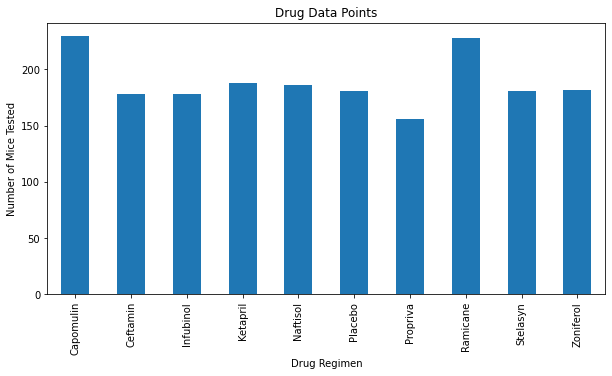

In [112]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_data_points = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
drug_data_points.plot(kind = "bar", figsize = (10,5))

plt.title("Drug Data Points")
plt.ylabel("Number of Mice Tested")

plt.show()


Text(0, 0.5, 'Number of Mice Tested')

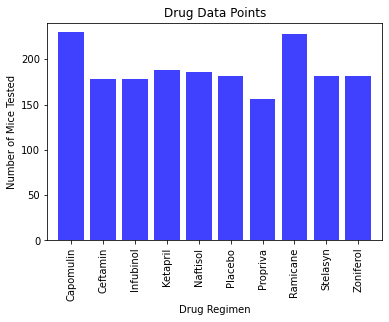

In [113]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_array = np.asarray(drug_data_points)

x_axis = np.arange(len(drug_data_points))

plt.bar(x_axis, drug_array, color="b", alpha=0.75, align="center")

ticks = [value for value in x_axis]
plt.xticks(ticks, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo",
                  "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = "vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_array)+10)

plt.title("Drug Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

In [114]:
#Create the dataframe for the gender percentages
gender_groups = clean_df.groupby(["Mouse ID", "Sex"])

gender_df = pd.DataFrame(gender_groups.size())
gender_df

gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender.columns = ["Total Count"]

gender["Percentage"] = (100*(gender["Total Count"]/gender["Total Count"].sum()))

#Show the created dataframe for the percentages
gender

,Total Count,Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


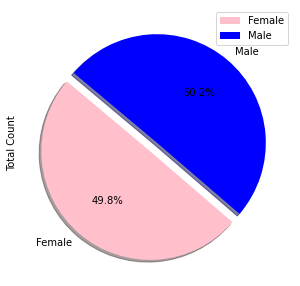

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
color = ["pink", "blue"]
explode = (0.1, 0)
plot = gender.plot.pie(y="Total Count", figsize = (5,5), colors=color, startangle=140,
                      explode=explode, shadow=True, autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x19e0affa2e8>,
 [Text(-0.7771287477781476, -0.9143691319028482, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.4533251028705861, -0.5333819936099948, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

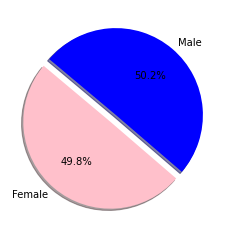

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]

sizes = [49.799197, 50.200803]

colors = ["pink", "blue"]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
       shadow=True, startangle=140)



## Quartiles, Outliers and Boxplots

In [117]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_data = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane",
                                                    "Infubinol", "Ceftamin"])]
best_data = best_data.sort_values(["Timepoint"], ascending = True)

best_drugs = best_data[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_drugs

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
best_drugs_sort = best_drugs.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
best_drugs_df = best_drugs_sort.to_frame()
best_drugs_df

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [119]:
# Put treatments into a list for for loop (and later for plot labels)
best_4 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

<function matplotlib.pyplot.show(*args, **kw)>

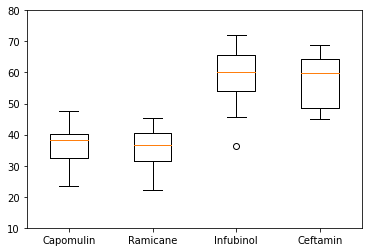

In [120]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_drugs_df.reset_index()
tumor_list = final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_list_df = pd.DataFrame(tumor_list)
tumor_list_df = tumor_list_df.reindex(best_4)
tumor_vols = [vol for vol in tumor_list_df["Tumor Volume (mm3)"]]
plt.boxplot(tumor_vols, labels=best_4)
plt.ylim(10,80)
plt.show

## Line and Scatter Plots

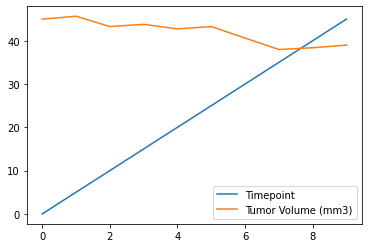

In [121]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_cap = clean_df[clean_df["Mouse ID"].isin(["b128"])]

mouse_cap_data = mouse_cap[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_df = mouse_cap_data.reset_index()

line_final = line_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line = line_final.plot.line()


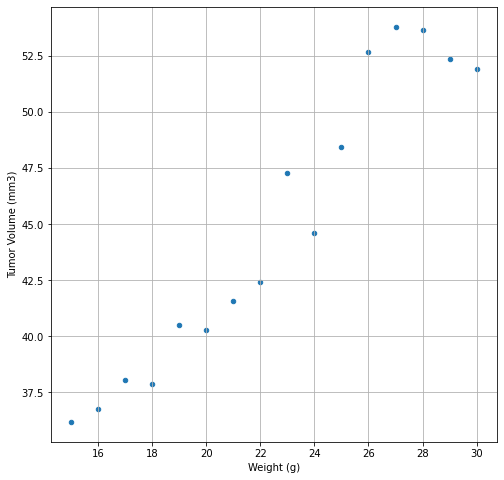

In [122]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_scat = clean_df[clean_df["Drug Regimen"].isin(["Capomulin"])]
cap_scat_df = best_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

#Sorting the dataframe by weight
cap_sort_weight_df = cap_scat_df.sort_values(["Weight (g)"], ascending=True)

cap_scat_plot = cap_scat.reset_index()

cap_weight = cap_sort.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

cap_weight_df = pd.DataFrame(cap_weight).reset_index()

#Weight = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

cap_scat = cap_weight_df.plot(kind="scatter", x='Weight (g)', y="Tumor Volume (mm3)",
                            grid=True, figsize=(8,8))
cap_scat

## Correlation and Regression

In [123]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = cap_weight_df["Weight (g)"]
y = cap_weight_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = lin_regress(x, y)
reg_val = x*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, reg_val, "r-")
plt.annotate(line_eq,(6,10), fontsize=10,color="blue")
plt.show


NameError: name 'lin_regress' is not defined